In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, HashingVectorizer, CountVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR, SVC
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV, LinearRegression, Ridge, ElasticNet
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
font2 = {'size': 20,'weight': 'normal'} # This code is so as to adjust the size of character among the axis
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("toxiccomments_train.csv")
data = data.dropna()

ID = data["id"]
identity_hate = data["identity_hate"]
comment_text = data['comment_text']
has = HashingVectorizer().fit(comment_text)
features = has.fit_transform(comment_text)



label = identity_hate

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.5, random_state=0)

lasso = Lasso()       #Revoke the model Lasso
ridge = Ridge()


In [5]:
from sklearn.model_selection import GridSearchCV
parameters = {
             "alpha":[0.02,0.03,0.04, 2,3]
#              ,'min_impurity_decrease':[*np.linspace(0,0.5,50)]
             }
# GridSearchCV同时满足了 fit score 交叉验证三种功能
GS = GridSearchCV(lasso,parameters,cv=2)
GS = GS.fit(X_train,y_train)
# 从输入的参数和参数取值的列表中，返回最佳组合
print("Lass of GS.best_params_ = ", GS.best_params_)

Lass of GS.best_params_ =  {'alpha': 0.02}


In [6]:
parameters2 = {
             "alpha":[0.1,1,2,3]
#              ,'min_impurity_decrease':[*np.linspace(0,0.5,50)]
             }
GS = GridSearchCV(ridge,parameters2,cv=2)
GS = GS.fit(X_train,y_train)
# 从输入的参数和参数取值的列表中，返回最佳组合
print("ridge.best_params_ = ", GS.best_params_)

ridge.best_params_ =  {'alpha': 1}


In [7]:
from sklearn.tree import DecisionTreeRegressor
parameters3 = {
             "max_depth":[1,2,3,4,5]}
D_tree=DecisionTreeRegressor()
GS = GridSearchCV(D_tree,parameters3,cv=2)
GS = GS.fit(X_train,y_train)
print("D_tree.best_params_ = ", GS.best_params_)

D_tree.best_params_ =  {'max_depth': 4}


ridge regression model mean absolute error： 0.020457761899748905
ridge regression model mean squared error： 0.0068206021763444775
ridge regression model median absolute error： 0.007167360833442235
ridge regression model explained variance score： 0.24872797109751654
ridge regression model r2 score： 0.248672327878816


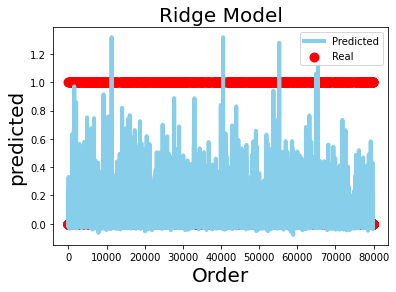

In [8]:
ridge = Ridge(alpha=1.0, fit_intercept=True, normalize=False,copy_X=True, max_iter=None, tol=1e-3, solver="auto",
                         random_state=None)
ridge.fit(X_train, y_train)             #Fit the train dataset
y_predict = ridge.predict(X_test)       #Predict the result by utilizing the Ridge model
print('ridge regression model mean absolute error：',mean_absolute_error(y_test,y_predict))
print('ridge regression model mean squared error：',mean_squared_error(y_test,y_predict))
print('ridge regression model median absolute error：',median_absolute_error(y_test,y_predict))
print('ridge regression model explained variance score：',explained_variance_score(y_test,y_predict))
print('ridge regression model r2 score：',r2_score(y_test,y_predict))
plt.figure()
plt.scatter( range(len(y_test)), y_test, color = "red", label = "Real", linewidth = 4)          #Plot the real data
plt.plot(range(len(y_test)), y_predict, color = "skyblue", label = "Predicted", linewidth = 4)  #Plot the predicted data
plt.title("Ridge Model", fontdict=font2)
plt.xlabel("Order", fontdict= font2)
plt.ylabel("predicted", fontdict= font2)
plt.legend()
plt.show()

Lasso regression model mean absolute error： 0.01745491571981748
Lasso regression model mean squared error ： 0.009078576206856249
Lasso regression model median absolute error： 0.008447703202356332
Lasso regression model explained variance score： 0.0
Lasso regression model r2 score： -5.6204909432588934e-05


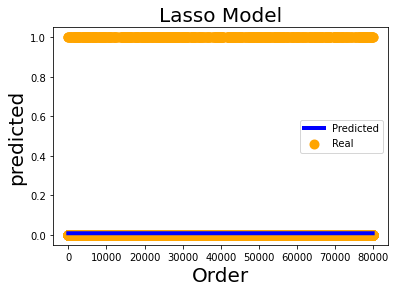

In [9]:
lasso = Lasso(alpha=0.02, normalize=True)       #Revoke the model Lasso
results_lasso = lasso.fit(X_train, y_train)     #Fit the train dataset
y_predict = lasso.predict(X_test)               #Predict the result by utilizing the Lasso model

print('Lasso regression model mean absolute error：',mean_absolute_error(y_test,y_predict))
print('Lasso regression model mean squared error ：',mean_squared_error(y_test,y_predict))
print('Lasso regression model median absolute error：',median_absolute_error(y_test,y_predict))
print('Lasso regression model explained variance score：',explained_variance_score(y_test,y_predict))
print('Lasso regression model r2 score：',r2_score(y_test,y_predict))
plt.figure()        #Create a new figure
plt.scatter( range(len(y_test)), y_test, color = "orange", label = "Real", linewidth = 4)   #Plot the real data
plt.plot(range(len(y_test)), y_predict, color = "blue", label = "Predicted", linewidth = 4) #Plot the predicted data
plt.title("Lasso Model", fontdict=font2)    #Set the model title name
plt.xlabel("Order", fontdict= font2)
plt.ylabel("predicted", fontdict= font2)
plt.legend()
plt.show()

D_tree regression model mean absolute error： 0.01524479139942859
D_tree regression model mean squared error ： 0.008149597545657477
D_tree regression model median absolute error： 0.006427753808224003
D_tree regression model explained variance score： 0.10232244423022518
D_tree regression model r2 score： 0.10227601692714505




E:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


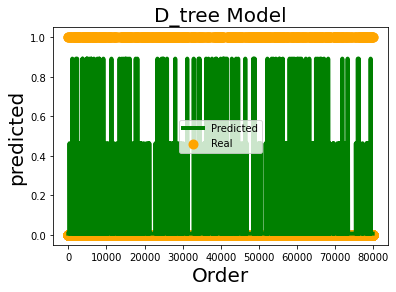

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.5, random_state=0)
D_tree=DecisionTreeRegressor(max_depth=4)
D_tree.fit(X_train,y_train)
y_predict = D_tree.predict(X_test) #Predict the result by utilizing the SVC model

print('D_tree regression model mean absolute error：',mean_absolute_error(y_test,y_predict))  #越小越好
print('D_tree regression model mean squared error ：',mean_squared_error(y_test,y_predict))   #越小越好
print('D_tree regression model median absolute error：',median_absolute_error(y_test,y_predict))  #越小越好
print('D_tree regression model explained variance score：',explained_variance_score(y_test,y_predict))    #越大越好
print('D_tree regression model r2 score：',r2_score(y_test,y_predict))     #越大越好                               #越大越好
print("\n")

plt.figure()        #Create a new figure
plt.scatter( range(len(y_test)), y_test, color = "orange", label = "Real", linewidth = 4)   #Plot the real data
plt.plot(range(len(y_test)), y_predict, color = "green", label = "Predicted", linewidth = 4) #Plot the predicted data
plt.title("D_tree Model", fontdict=font2)    #Set the model title name
plt.xlabel("Order", fontdict= font2)
plt.ylabel("predicted", fontdict= font2)
plt.legend()
plt.show()

In [11]:
ID_data = data['id']
fea_csv = HashingVectorizer().fit(data['comment_text'])
fea_csv = fea_csv.fit_transform(data['comment_text'])
ID_csv = pd.DataFrame({"id":ID_data, "prediction":D_tree.predict(fea_csv)})
for i in range(len(ID_csv)):
    if ID_csv["prediction"][i]>0.5:
        ID_csv["prediction"][i] = True
    else:
        ID_csv["prediction"][i]  = False
print("ID_csv = ", ID_csv)
ID_csv.to_csv("toxiccomments_submission4.csv")

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ID_csv =                        id prediction
0       0000997932d777bf      False
1       000103f0d9cfb60f      False
2       000113f07ec002fd      False
3       0001b41b1c6bb37e      False
4       0001d958c54c6e35      False
...                  ...        ...
159566  ffe987279560d7ff      False
159567  ffea4adeee384e90      False
159568  ffee36eab5c267c9      False
159569  fff125370e4aaaf3      False
159570  fff46fc426af1f9a      False

[159571 rows x 2 columns]
